<a href="https://colab.research.google.com/github/Jaehyeon-kr/LG_jaehyeon/blob/main/optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install catboost
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:00


In [8]:
from catboost.utils import get_gpu_device_count
print(get_gpu_device_count())


1


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
# pp: Preprocess 약어

## List (Categroy, drop...)

In [26]:
# DI여서 nan인 Column (numeric)
di_nan_col = ['미세주입된 난자 수',
              '미세주입에서 생성된 배아 수',
              '총 생성 배아 수',
              '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수',
              '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수','파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수','난자 혼합 경과일'
        ]        # 여부 관련 추가 (0206.목)
di_gumsa_col =     ['착상 전 유전 검사 사용 여부','착상 전 유전 진단 사용 여부', '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부',
            ]

# drop_list = ['ID', '착상 전 유전 검사 사용 여부','착상 전 유전 진단 사용 여부','파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수',
#              '불임 원인 - 정자 면역학적 요인', '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부', '난자 채취 경과일']
drop_list = ['ID', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성']

category_columns = [
    "시술 당시 나이",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "시술 시기 코드",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부",
    "임신 경과 연수 범주",
]

num_columns = [

    '임신 시도 또는 마지막 임신 경과 연수',

    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
]

## Train 데이터 통계치 정리

## Test Code

In [31]:
df_train = pd.read_csv("/content/drive/MyDrive/lgaimers/train.csv")

df_test = pd.read_csv("/content/drive/MyDrive/lgaimers/test.csv")

In [34]:
import pandas as pd


# 재정의
di_nan_col = ['미세주입된 난자 수',
              '미세주입에서 생성된 배아 수',
              '총 생성 배아 수',
              '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수',
              '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수','파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수'
              , "난자 채취 경과일" , "난자 해동 경과일", "배아 이식 경과일", "배아 해동 경과일", "동결 배아 사용 여부", "신선 배아 사용 여부", "기증 배아 사용 여부", "단일 배아 이식 여부", '난자 혼합 경과일'
]

# # 여부 관련 포함 (0206.목)
def pp_fillna(df):
    # onehot_encoder = OneHotEncoder(sparse_output=False)
    for col in di_nan_col:
        df[col].fillna(0, inplace = True)

def pp_fillna_gumsa(df):
    for col in di_gumsa_col:
        df[col].fillna(0, inplace = True)

def change_to_number(df):
    """
    특정 컬럼에 대해 '횟수'와 같은 문자열 값을 숫자로 변환하는 함수.
    :param df: pandas DataFrame
    :return: 변환된 DataFrame
    """
    ivf_cols = [
        "IVF 임신 횟수", "IVF 출산 횟수", "DI 임신 횟수", "DI 출산 횟수",
        "IVF 시술 횟수", "총 임신 횟수", "DI 시술 횟수", "총 시술 횟수", "클리닉 내 총 시술 횟수","총 출산 횟수"
    ]

    map_ = {'0회': 0, '1회': 1, '2회': 2, '3회': 3, '4회': 4, '5회': 5, '6회 이상': 6}

    for col in ivf_cols:
        if col in df.columns:  # ✅ 컬럼이 존재하는지 확인
            df[col] = df[col].replace(map_)  # ✅ 문자열을 숫자로 변환
            df[col] = pd.to_numeric(df[col], errors='coerce')  # ✅ 숫자로 변환 (문자열 값 방지)

    return df  # ✅ 변환된 DataFrame 반환

def pp_about_di(df):

    df['배아_성공률'] = df['이식된 배아 수'] / (df['총 생성 배아 수'] + 1e-4)
    df['난자_성공률'] = df['미세주입된 난자 수'] / (df['수집된 신선 난자 수'] + 1e-4)
    df['배아_저장률'] = df['저장된 배아 수'] / (df['총 생성 배아 수'] + 1e-4)
    df['난자_저장률'] = df['저장된 신선 난자 수'] / (df['수집된 신선 난자 수'] + 1e-4)

    df['시술_성공률'] = (df['IVF 임신 횟수'] + df['DI 임신 횟수']) / (df['IVF 시술 횟수'] + df['DI 시술 횟수'] + 1e-4)
    df['출산_성공률'] = (df['IVF 출산 횟수'] + df['DI 출산 횟수']) / (df['총 임신 횟수'] + 1e-4)
    df['IVF_성공률'] = df['IVF 임신 횟수'] / (df['IVF 시술 횟수'] + 1e-4)
    df['DI_성공률'] = df['DI 임신 횟수'] / (df['DI 시술 횟수'] + 1e-4)



def pp_derived_features(df):
    """
    예시 파생변수 생성:
    1) embryo_transfer_ratio = 이식된 배아 수 / (총 생성 배아 수 + eps)
    2) past_treatment_success_rate = 총 임신 횟수 / (총 시술 횟수 + eps)
    3) time_diff = 배아 이식 경과일 - 난자 혼합 경과일
    """
    eps = 1e-9

    # 1) Embryo Transfer Ratio
    if all(col in df.columns for col in ["이식된 배아 수", "총 생성 배아 수"]):
        df["embryo_transfer_ratio"] = (
            df["이식된 배아 수"] / (df["총 생성 배아 수"] + 1e-9)
        )

    # 2) Past Treatment Success Rate
    if all(col in df.columns for col in ["총 임신 횟수", "총 시술 횟수"]):
        df["past_treatment_success_rate"] = (
            df["총 임신 횟수"] / (df["총 시술 횟수"] + 1e-9)
        )

    # 3) Time Difference
    if all(col in df.columns for col in ["배아 이식 경과일", "난자 혼합 경과일"]):
        df["time_diff"] = df["배아 이식 경과일"] - df["난자 혼합 경과일"]
    df["time_diff"] = df["time_diff"].fillna(0)
    return df

def pp_age_ordinal(df):
  age_order = ['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세']
  df['시술 당시 나이'] = df['시술 당시 나이'].replace('알 수 없음', '만45-50세')

  return df

def pp_chaksang_jeon(df):
  col = ["착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "PGD 시술 여부", "PGS 시술 여부"]

  for i in col:
    df[i] = df[i].fillna(0)
    df[i] = df[i].astype('category')
  return df

def pp_fillna(df):
    # onehot_encoder = OneHotEncoder(sparse_output=False)
    for col in di_nan_col:
        df[col].fillna(0, inplace = True)
    return df

def pp_fillna_gumsa(df):
    for col in di_gumsa_col:
        df[col].fillna(0, inplace = True)
    return df


def pp_donate_nanja(df):
  col = ["난자 기증자 나이", "정자 기증자 나이"]
  for i in col:
    df[i].replace({'알 수 없음' : '만 21-25세'} , inplace = True)
  return df


def pp_categorize_embryo_creation_reason(df):
    """
    '배아 생성 주요 이유' 컬럼을 특정 그룹으로 범주화하는 함수.

    :param df: pandas DataFrame
    :param col: 범주화할 컬럼명 (기본값: '배아 생성 주요 이유')
    :return: 변환된 DataFrame
    """

    col= ["배아 생성 주요 이유"]
    # ✅ NaN 값 처리
    df[col] = df[col].fillna("시술용")  # NaN은 기본적으로 '시술용'으로 설정

    # ✅ 범주화 딕셔너리
    category_map = {
        "현재 시술용": "시술용",
        "기증용": "기증용",
        "기증용, 현재 시술용": "기증용",
        "기증용, 배아 저장용": "기증용",
        "기증용, 난자 저장용": "기증용",
        "배아 저장용": "배아 저장용",
        "배아 저장용, 현재 시술용": "배아 저장용",
        "난자 저장용": "난자 저장용",
        "난자 저장용, 배아 저장용": "난자 저장용",
        "난자 저장용, 배아 저장용, 연구용": "난자 저장용",
        "연구용, 현재 시술용": "연구용",
        "기증용, 배아 저장용, 현재 시술용": "복합용도"
    }

    # ✅ 범주 매핑 적용
    df[col] = df[col].replace(category_map)

    return df

def pp_fill_pregnancy_duration(df):
    """
    '임신 시도 또는 마지막 임신 경과 연수'의 NaN 값을 '총 임신 횟수'를 기준으로 채우는 함수.

    :param df: pandas DataFrame
    :return: 변환된 DataFrame
    """

    df = df.copy()  # ✅ 원본 데이터 손상 방지

    # ✅ '총 임신 횟수' 컬럼이 존재하는지 확인
    if "총 임신 횟수" in df.columns and "임신 시도 또는 마지막 임신 경과 연수" in df.columns:
        df.loc[(df["임신 시도 또는 마지막 임신 경과 연수"].isna()) & (df["총 임신 횟수"] >= 1), "임신 시도 또는 마지막 임신 경과 연수"] = 10
        df.loc[(df["임신 시도 또는 마지막 임신 경과 연수"].isna()) & (df["총 임신 횟수"] == 0), "임신 시도 또는 마지막 임신 경과 연수"] = 0

    return df


pp_fillna(df_train)
pp_fillna(df_test)

change_to_number(df_train)
change_to_number(df_test)

pp_about_di(df_train)
pp_about_di(df_test)

pp_derived_features(df_train)
pp_derived_features(df_test)

pp_age_ordinal(df_train)
pp_age_ordinal(df_train)

pp_chaksang_jeon(df_test)
pp_chaksang_jeon(df_test)

pp_fillna(df_train)
pp_fillna(df_test)

pp_fillna_gumsa(df_train)
pp_fillna_gumsa(df_test)

pp_donate_nanja(df_train)
pp_donate_nanja(df_test)

pp_categorize_embryo_creation_reason(df_train)
pp_categorize_embryo_creation_reason(df_test)

pp_fill_pregnancy_duration(df_train)
pp_fill_pregnancy_duration(df_test)

<ipython-input-34-270422c04cc0>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(map_)  # ✅ 문자열을 숫자로 변환
<ipython-input-34-270422c04cc0>:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace = True)
<ipython-input-34-270422c04cc0>:96: FutureWarning: A 

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,난자_성공률,배아_저장률,난자_저장률,시술_성공률,출산_성공률,IVF_성공률,DI_성공률,embryo_transfer_ratio,past_treatment_success_rate,time_diff
0,TEST_00000,TRYBLT,만35-37세,0.0,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,...,0.000000,0.428565,0.0,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.0
1,TEST_00001,TRDQAZ,만18-34세,0.0,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.0
2,TEST_00002,TRCMWS,만40-42세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,...,0.999989,0.000000,0.0,0.000000,0.0,0.0,0.000000,6.000000e-01,0.000000,3.0
3,TEST_00003,TRJXFG,만40-42세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,...,0.999950,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000e+00,0.000000,2.0
4,TEST_00004,TRJXFG,만35-37세,0.0,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,...,0.999990,0.699993,0.0,0.000000,0.0,0.0,0.000000,2.000000e-01,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,TEST_90062,TRDQAZ,만18-34세,0.0,IVF,ICSI:ICSI,1,기록되지 않은 시행,0.0,0.0,...,0.999990,0.699993,0.0,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.0
90063,TEST_90063,TRYBLT,만43-44세,0.0,IVF,Unknown,0,알 수 없음,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.000000e+09,0.000000,0.0
90064,TEST_90064,TRVNRY,만18-34세,0.0,IVF,IVF,0,알 수 없음,1.0,0.0,...,0.000000,0.333331,0.0,0.000000,0.0,0.0,0.000000,6.666667e-02,0.000000,5.0
90065,TEST_90065,TRCMWS,만43-44세,10.0,IVF,Unknown,0,알 수 없음,0.0,0.0,...,0.000000,0.000000,0.0,0.099999,0.0,0.0,0.166664,2.000000e+09,0.166667,4.0


In [43]:
# 변환할 컬럼 리스트
col = ["총 생성 배아 수"]
for i in df_train.columns:
    print(i, df_train[i].dtype)
    print(i, df_train[i].unique())
    print("=")
    print(" ")


시술 시기 코드 category
시술 시기 코드 ['TRZKPL', 'TRYBLT', 'TRVNRY', 'TRJXFG', 'TRXQMD', 'TRCMWS', 'TRDQAZ']
Categories (7, object): ['TRCMWS', 'TRDQAZ', 'TRJXFG', 'TRVNRY', 'TRXQMD', 'TRYBLT', 'TRZKPL']
=
 
시술 당시 나이 category
시술 당시 나이 ['만18-34세', '만45-50세', '만35-37세', '만38-39세', '만40-42세', '만43-44세']
Categories (6, object): ['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세']
=
 
임신 시도 또는 마지막 임신 경과 연수 float64
임신 시도 또는 마지막 임신 경과 연수 [nan 10.  6.  7.  8. 12.  9.  3. 16. 11. 15.  5. 13. 17.  4. 14. 19. 20.
 18.  2.  0.  1.]
=
 
시술 유형 category
시술 유형 ['IVF', 'DI']
Categories (2, object): ['DI', 'IVF']
=
 
특정 시술 유형 category
특정 시술 유형 ['ICSI', 'IVF', 'Unknown', 'IUI', 'IVF:IVF', ..., 'GIFT', 'ICSI / BLASTOCYST:IVF / BLASTOCYST', 'ICSI / AH:Unknown', 'FER', 'ICSI / BLASTOCYST :ICSI']
Length: 25
Categories (25, object): ['FER', 'GIFT', 'Generic DI', 'ICI', ..., 'IVF:Unknown', 'IVI', 'Unknown',
                          'nan']
=
 
배란 자극 여부 category
배란 자극 여부 ['1', '0']
Categories (2, object): ['

In [51]:
# num_columns 리스트에 추가할 컬럼들
additional_num_columns = [
    "배아_성공률", "난자_성공률", "배아_저장률", "난자_저장률",
    "시술_성공률", "출산_성공률", "IVF_성공률", "DI_성공률",
    "embryo_transfer_ratio", "past_treatment_success_rate", "time_diff"
]

# 기존 num_columns에 추가
num_columns.extend(additional_num_columns)

# 중복 제거 (혹시라도 중복된 컬럼이 있을 경우)
num_columns = list(set(num_columns))

print("✅ num_columns 리스트 업데이트 완료:", num_columns)


✅ num_columns 리스트 업데이트 완료: ['혼합된 난자 수', '해동된 배아 수', '난자 혼합 경과일', '미세주입에서 생성된 배아 수', '미세주입 배아 이식 수', '배아_저장률', '시술_성공률', '미세주입된 난자 수', '임신 시도 또는 마지막 임신 경과 연수', '이식된 배아 수', '배아 이식 경과일', 'IVF_성공률', '수집된 신선 난자 수', '배아_성공률', '저장된 신선 난자 수', '저장된 배아 수', '난자 채취 경과일', '난자_저장률', '배아 해동 경과일', 'past_treatment_success_rate', '총 생성 배아 수', '파트너 정자와 혼합된 난자 수', '난자 해동 경과일', 'time_diff', '기증자 정자와 혼합된 난자 수', 'DI_성공률', 'embryo_transfer_ratio', '미세주입 후 저장된 배아 수', '난자_성공률', '출산_성공률', '해동 난자 수']


In [52]:
def convert_type(df):
    """
    컬럼 타입을 자동 변환하는 함수.
    - 기존 `category` 타입이 아니면 `sub_num_columns`에 추가
    - 기존 `numeric` 타입이 아니면 `sub_category_columns`에 추가

    :param df: pandas DataFrame
    :return: 변환된 DataFrame
    """

    global category_columns, num_columns
    sub_category_columns = category_columns.copy()
    sub_num_columns = num_columns.copy()

    df = df.copy()  # 원본 데이터 손상 방지

    # ✅ drop_list에 있는 column들은 변환 리스트에서 제외
    sub_category_columns = [x for x in category_columns if x not in drop_list]
    sub_num_columns = [x for x in num_columns if x not in drop_list]

    # ✅ 컬럼 타입 변환
    for col in df.columns:
        if col in sub_category_columns:
            # 기존 dtype이 category가 아닌 경우 category로 변환
            if not pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype(str).astype('category')
                sub_num_columns.append(col)  # 🚀 category가 아니었으므로 숫자 컬럼 리스트에 추가

        elif col in sub_num_columns:
            # 기존 dtype이 numeric이 아닌 경우 float로 변환
            if not pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce')
                sub_category_columns.append(col)  # 🚀 숫자가 아니었으므로 category 컬럼 리스트에 추가

        else:
            print(f"⚠️ column: {col} is not in category_columns or num_columns list")

    return df


In [53]:
df_train = convert_type(df_train)
df_test = convert_type(df_test)


⚠️ column: 임신 성공 여부 is not in category_columns or num_columns list


<ipython-input-52-17aa82f31194>:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[col]):


In [50]:
import pandas as pd

drop_list.append('임신 경과 연수 범주')


def update_column_types_with_drop(df, drop_list):
    """
    전역 리스트(category_columns, num_columns)에 없는 컬럼을 dtype에 따라 자동으로 추가하는 함수.
    또한 drop_list에 있는 컬럼을 제거.

    :param df: pandas DataFrame
    :param drop_list: 제거할 컬럼 리스트
    :return: 업데이트된 category_columns, num_columns 리스트, drop된 df
    """

    global category_columns, num_columns

    # ✅ 기존 리스트 복사
    updated_category_columns = [col for col in category_columns if col not in drop_list]
    updated_num_columns = [col for col in num_columns if col not in drop_list]

    # ✅ df의 모든 컬럼을 검사하여 없던 컬럼을 자동으로 추가
    for col in df.columns:
        if col not in updated_category_columns and col not in updated_num_columns and col not in drop_list:
            if pd.api.types.is_numeric_dtype(df[col]):  # 숫자형 컬럼인지 확인
                updated_num_columns.append(col)
            elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):  # 문자형인지 확인
                updated_category_columns.append(col)

    # ✅ drop_list에 있는 컬럼을 제거한 df 생성
    df = df.drop(columns=drop_list, errors='ignore')  # 🚀 존재하지 않는 컬럼이 있어도 에러 방지

    return df, updated_category_columns, updated_num_columns

df_train, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_train, drop_list)

df_test, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_test, drop_list)


In [40]:
def convert_category_columns(df, category_columns):
    """
    CatBoost에서 오류가 발생하지 않도록 category 컬럼을 string으로 변환.

    :param df: pandas DataFrame
    :param category_columns: 범주형 컬럼 리스트
    :return: 변환된 DataFrame
    """
    df = df.copy()

    for col in category_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)  # 모든 값을 문자열로 변환

    return df

df_train = convert_category_columns(df_train, category_columns)
df_test = convert_category_columns(df_test, category_columns)



In [44]:
print(updated_category_columns)
print(updated_num_columns)

['시술 당시 나이', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '시술 시기 코드', '시술 유형', '특정 시술 유형', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부']
['혼합된 난자 수', '해동된 배아 수', '난자 혼합 경과일', '미세주입에서 생성된 배아 수', '미세주입 배아 이식 수', '배아_저장률', '시술_성공률', '미세주입된 난자 수', '임신 시도 또는 마지막 임신 경과 연수', '이식된 배아 수', '배아 이식 경과일', 'IVF_성공률', '수집된 신선 난자 수', '배아_성공률', '저장된 신선 난자 수', '저장된 배아 수', '난자 채취 경과일', '난자_저장률', '배아 해동 경과일', 'past_treatment_success_rate', '총 생성 배아 수', '파트너 정자와 혼합된 난자 수', '난자 해동 경과일', 'time_diff', '기증자 정자와 혼합된 난자 수', 'DI_성공률', 'embryo_transfer_ratio', '미세주입 후 저장

## CatBoost Model test

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
import os
from pprint import pprint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [97]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.1 MB/s eta 0:00:00


### 제출 결과 0.7412

In [141]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

N_SPLITS = 20
RANDOM_STATE = 42

class_counts = df_train['임신 성공 여부'].value_counts().to_dict()

# 샘플 개수의 역수를 기반으로 가중치 계산 (샘플 개수가 적을수록 가중치 증가)
class_weights = [class_counts[1] / class_counts[0], class_counts[0] / class_counts[1]]



Best_Hyperparams1 ={'bagging_temperature': 0.34855471754199147,
 'border_count': 128,
 'depth': 5,
 'eval_metric': 'Logloss',
 'iterations': 5000,
 'l2_leaf_reg': 3.7383117174881337,
 'learning_rate': 0.06239906179892577,
 'loss_function': 'Logloss',
 'od_type': 'Iter',
 'od_wait': 200,
 'random_seed': RANDOM_STATE,
 'random_strength': 0.012175171854050976,
 'task_type': 'GPU',
 'use_best_model': True,
 'verbose': 100,
 "class_weights": {0: 1.0, 1:  1.0113851477295377}
                    }


# 🔧 최적화된 CatBoost 하이퍼파라미터 적용
cb_params = Best_Hyperparams1

# 평가 함수 정의
def get_clf_eval(y_true, y_pred, y_pred_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    return accuracy, precision, recall, F1, auc

# OOF 배열 준비
oof_preds = np.zeros(len(df_train))
test_preds = np.zeros(len(df_test))  # 테스트 예측 평균을 위해

# 범주형 변수 인덱스 찾기 (CatBoost 전용)
categorical_features_indices = updated_category_columns

# 각 폴드별 성능 저장 리스트
accuracy_list, precision_list, recall_list, f1_list, auc_list, feature_importance_list = [], [], [], [], [], []

# Stratified K-Fold
kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, df_train["임신 성공 여부"])):
    print(f"============= Training Fold {fold+1}... =============")

    # 데이터 분할 (원본 df_train 손상 방지)
    train_data, val_data = df_train.iloc[train_idx], df_train.iloc[val_idx]
    x_train, y_train = train_data.drop('임신 성공 여부', axis=1), train_data["임신 성공 여부"]
    x_val, y_val = val_data.drop('임신 성공 여부', axis=1), val_data["임신 성공 여부"]

    # CatBoost Pool 생성
    train_pool = Pool(x_train, label=y_train, cat_features=categorical_features_indices)
    eval_pool = Pool(x_val, label=y_val, cat_features=categorical_features_indices)

    # CatBoost 훈련
    model = CatBoostClassifier(**cb_params)
    model.fit(train_pool, eval_set=eval_pool, verbose=100, early_stopping_rounds=100)

    # 검증 데이터 예측
    val_pred_probs = model.predict_proba(x_val)[:, 1]  # 확률값
    val_pred = (val_pred_probs > 0.5).astype(int)  # 0 또는 1로 변환

    # OOF 예측 저장
    oof_preds[val_idx] = val_pred_probs

    # 평가
    accuracy, precision, recall, F1, auc = get_clf_eval(y_val, val_pred, val_pred_probs)

    # 성능 저장
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(F1)
    auc_list.append(auc)
    feature_importance_list.append(model.get_feature_importance())

    # Test predictions (for averaging)
    test_preds += model.predict_proba(df_test)[:, 1] / N_SPLITS

============= Training Fold 1... =============
0:	learn: 0.6591389	test: 0.6588007	best: 0.6588007 (0)	total: 22.5ms	remaining: 1m 52s
100:	learn: 0.4906948	test: 0.4904378	best: 0.4904378 (100)	total: 2.16s	remaining: 1m 44s
200:	learn: 0.4884247	test: 0.4892137	best: 0.4892137 (200)	total: 4.27s	remaining: 1m 41s
300:	learn: 0.4872992	test: 0.4888886	best: 0.4888886 (300)	total: 6.39s	remaining: 1m 39s
400:	learn: 0.4863912	test: 0.4888418	best: 0.4887979 (334)	total: 8.56s	remaining: 1m 38s
bestTest = 0.4887979413
bestIteration = 334
Shrink model to first 335 iterations.
============= Training Fold 2... =============
0:	learn: 0.6592329	test: 0.6585003	best: 0.6585003 (0)	total: 21.9ms	remaining: 1m 49s
100:	learn: 0.4907386	test: 0.4901592	best: 0.4901592 (100)	total: 2.14s	remaining: 1m 43s
200:	learn: 0.4884302	test: 0.4890272	best: 0.4890272 (200)	total: 4.26s	remaining: 1m 41s
300:	learn: 0.4872039	test: 0.4886886	best: 0.4886756 (298)	total: 6.38s	remaining: 1m 39s
400:	learn:

In [142]:
def print_metrics(metrics):
    print("\n📌 Final Cross-Validation Results:")
    for name, values in metrics.items():
        print(f"   - {name}: {np.mean(values):.4f} ± {np.std(values):.4f}")

metrics = {
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list,
    "AUC": auc_list
}

print_metrics(metrics)


📌 Final Cross-Validation Results:
   - Accuracy: 0.7461 ± 0.0023
   - Precision: 0.5361 ± 0.0183
   - Recall: 0.1253 ± 0.0089
   - F1 Score: 0.2031 ± 0.0127
   - AUC: 0.7404 ± 0.0055


In [143]:
FILEPATH = '/content/drive/MyDrive/lgaimers'
OUTPUT_DIR = '/content/drive/MyDrive/lgaimers'
OUTPUT_NAME = '/cat_5.csv'
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv(FILEPATH + "/sample_submission.csv")
df_sub['probability'] = test_preds

# 제출 파일 저장
df_sub.to_csv(OUTPUT_DIR + OUTPUT_NAME, index=False)

In [2]:
def evaluate_feature_importance(auc_list, feature_importance_list, x_train, top_features=100):
    """
    F1 스코어 출력 및 특징 중요도 시각화 함수

    Parameters:
    - auc_list (list): AUC 점수 리스트
    - feature_importance_list (list of arrays): 모델별 특징 중요도 리스트
    - x_train (DataFrame): 학습 데이터셋 (특징 이름을 가져오기 위함)
    - top_features (int): 상위 N개의 특징만 시각화 (기본값 100)

    Returns:
    - mean_auc (float): 평균 AUC 점수
    - sorted_feature_names (list): 중요도 기준 정렬된 상위 특징 이름 리스트
    - sorted_mean_importance (array): 정렬된 특징 중요도 배열
    """

    # 평균 AUC 점수 출력
    mean_auc = np.mean(auc_list)
    print("예상 Score:", mean_auc)

    # 특징 중요도 평균 계산 및 정렬
    mean_importance = np.mean(feature_importance_list, axis=0)
    sorted_indices = np.argsort(mean_importance)[:top_features]  # 오름차순 정렬 후 top_features 선택
    sorted_feature_names = [x_train.columns[i] for i in sorted_indices]
    sorted_mean_importance = mean_importance[sorted_indices]

    # 중요도 시각화
    plt.figure(figsize=(10, 20))
    plt.barh(sorted_feature_names, sorted_mean_importance)
    plt.xlabel('Mean Importance')
    plt.ylabel('Features')
    plt.title('Mean Feature Importance')
    plt.show()

    return mean_auc, sorted_feature_names, sorted_mean_importance


### 제출 결과 0.7413539869

In [45]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

N_SPLITS = 30
RANDOM_STATE = 42

class_counts = df_train['임신 성공 여부'].value_counts().to_dict()

# 샘플 개수의 역수를 기반으로 가중치 계산 (샘플 개수가 적을수록 가중치 증가)
class_weights = [class_counts[1] / class_counts[0], class_counts[0] / class_counts[1]]



Best_Hyperparams1 ={'bagging_temperature': 0.34855471754199147,
 'border_count': 128,
 'depth': 5,
 'eval_metric': 'Logloss',
 'iterations': 5000,
 'l2_leaf_reg': 3.7383117174881337,
 'learning_rate': 0.06239906179892577,
 'loss_function': 'Logloss',
 'od_type': 'Iter',
 'od_wait': 200,
 'random_seed': RANDOM_STATE,
 'random_strength': 0.012175171854050976,
 'task_type': 'GPU',
 'use_best_model': True,
 'verbose': 100,
 "class_weights": {0: 1.0, 1:  1.0113851477295377}
                    }


# 🔧 최적화된 CatBoost 하이퍼파라미터 적용
cb_params = Best_Hyperparams1

# 평가 함수 정의
def get_clf_eval(y_true, y_pred, y_pred_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    return accuracy, precision, recall, F1, auc

# OOF 배열 준비
oof_preds = np.zeros(len(df_train))
test_preds = np.zeros(len(df_test))  # 테스트 예측 평균을 위해

# 범주형 변수 인덱스 찾기 (CatBoost 전용)
categorical_features_indices = updated_category_columns

# 각 폴드별 성능 저장 리스트
accuracy_list, precision_list, recall_list, f1_list, auc_list, feature_importance_list = [], [], [], [], [], []

# Stratified K-Fold
kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, df_train["임신 성공 여부"])):
    print(f"============= Training Fold {fold+1}... =============")

    # 데이터 분할 (원본 df_train 손상 방지)
    train_data, val_data = df_train.iloc[train_idx], df_train.iloc[val_idx]
    x_train, y_train = train_data.drop('임신 성공 여부', axis=1), train_data["임신 성공 여부"]
    x_val, y_val = val_data.drop('임신 성공 여부', axis=1), val_data["임신 성공 여부"]

    # CatBoost Pool 생성
    train_pool = Pool(x_train, label=y_train, cat_features=categorical_features_indices)
    eval_pool = Pool(x_val, label=y_val, cat_features=categorical_features_indices)

    # CatBoost 훈련
    model = CatBoostClassifier(**cb_params)
    model.fit(train_pool, eval_set=eval_pool, verbose=100, early_stopping_rounds=100)

    # 검증 데이터 예측
    val_pred_probs = model.predict_proba(x_val)[:, 1]  # 확률값
    val_pred = (val_pred_probs > 0.5).astype(int)  # 0 또는 1로 변환

    # OOF 예측 저장
    oof_preds[val_idx] = val_pred_probs

    # 평가
    accuracy, precision, recall, F1, auc = get_clf_eval(y_val, val_pred, val_pred_probs)

    # 성능 저장
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(F1)
    auc_list.append(auc)

    feature_importance_list.append(model.get_feature_importance())

    # Test predictions (for averaging)
    test_preds += model.predict_proba(df_test)[:, 1] / N_SPLITS

============= Training Fold 1... =============
0:	learn: 0.6593069	test: 0.6589834	best: 0.6589834 (0)	total: 29.4ms	remaining: 2m 26s
100:	learn: 0.4906501	test: 0.4893238	best: 0.4893238 (100)	total: 2.13s	remaining: 1m 43s
200:	learn: 0.4883888	test: 0.4883692	best: 0.4883692 (200)	total: 4.23s	remaining: 1m 41s
300:	learn: 0.4872019	test: 0.4880646	best: 0.4880549 (280)	total: 6.37s	remaining: 1m 39s
400:	learn: 0.4863372	test: 0.4879988	best: 0.4879988 (400)	total: 8.65s	remaining: 1m 39s
500:	learn: 0.4855543	test: 0.4880379	best: 0.4879425 (418)	total: 10.9s	remaining: 1m 37s
bestTest = 0.4879425352
bestIteration = 418
Shrink model to first 419 iterations.
============= Training Fold 2... =============
0:	learn: 0.6591876	test: 0.6585448	best: 0.6585448 (0)	total: 21.9ms	remaining: 1m 49s
100:	learn: 0.4904413	test: 0.4901173	best: 0.4901173 (100)	total: 2.19s	remaining: 1m 46s
200:	learn: 0.4882409	test: 0.4891256	best: 0.4891125 (195)	total: 4.39s	remaining: 1m 44s
300:	learn:

### 제출결과 0.7413539869

In [46]:
def print_metrics(metrics):
    print("\n📌 Final Cross-Validation Results:")
    for name, values in metrics.items():
        print(f"   - {name}: {np.mean(values):.4f} ± {np.std(values):.4f}")

metrics = {
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list,
    "AUC": auc_list
}

print_metrics(metrics)


📌 Final Cross-Validation Results:
   - Accuracy: 0.7463 ± 0.0024
   - Precision: 0.5375 ± 0.0187
   - Recall: 0.1273 ± 0.0097
   - F1 Score: 0.2058 ± 0.0138
   - AUC: 0.7405 ± 0.0064


In [47]:
FILEPATH = '/content/drive/MyDrive/lgaimers'
OUTPUT_DIR = '/content/drive/MyDrive/lgaimers'
OUTPUT_NAME = '/cat_6.csv'
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv(FILEPATH + "/sample_submission.csv")
df_sub['probability'] = test_preds

# 제출 파일 저장
df_sub.to_csv(OUTPUT_DIR + OUTPUT_NAME, index=False)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

예상 Score: 0.740495025605708


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

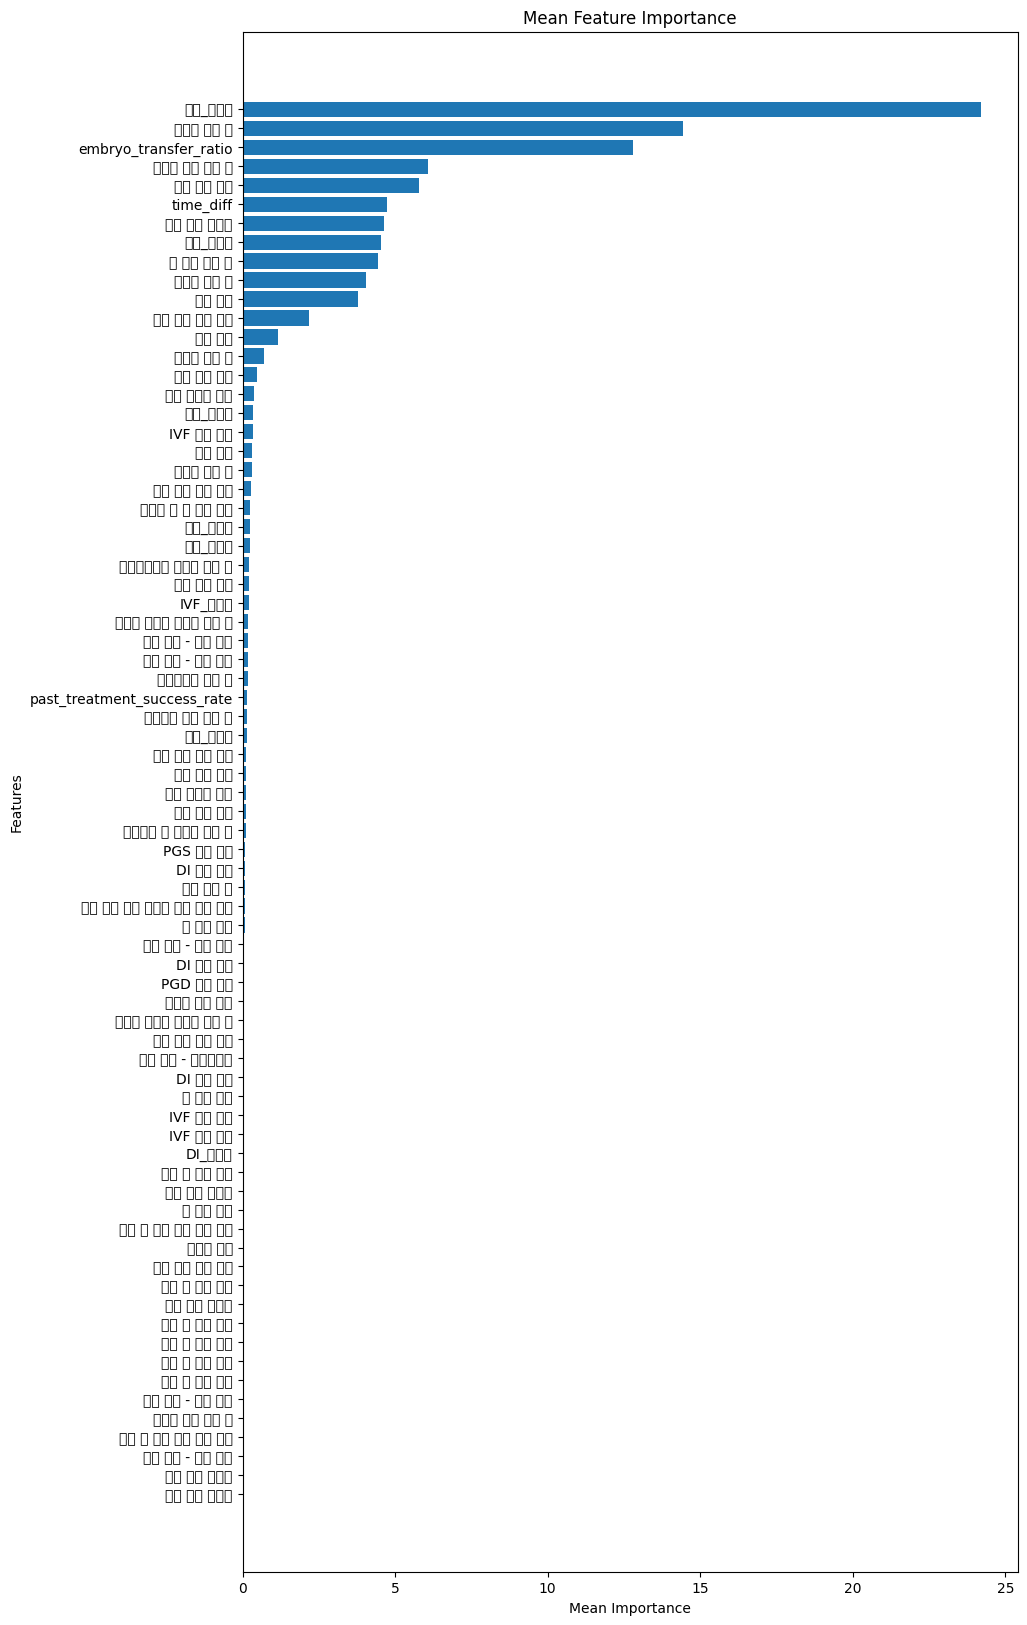

In [48]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

mean_auc, sorted_features, sorted_importance = evaluate_feature_importance(auc_list, feature_importance_list, x_train)
#예상 Score: 0.7397551138764016 -> 7389 (현재까지 한거)
#예상 Score: 0.7399120707670876 -> 7403
# all fix : -> 20fold 0.7412
# all fix : -> 30fold 0.74135
# all fix + 0만 있어서 계산 다했기에 난자채취일 drop : -> 35fold ?
#예상 Score: 0.7393244729077305(제출 -> 0.7405)

In [54]:
print(auc_list)

[0.7437573887204394, 0.7438804183538908, 0.7423122847167345, 0.7309110559748286, 0.7355277743740583, 0.7330239435812183, 0.7372302735079569, 0.7313770994296096, 0.7503994504990933, 0.7447797628332811, 0.7453907165630801, 0.7516806589321136, 0.7402396459928484, 0.7524155780520659, 0.7408604829469438, 0.7366880201508051, 0.7372059911538628, 0.7395772584750704, 0.7475676982204812, 0.7342188761426451, 0.7305738182471018, 0.7482896057888682, 0.740472263769488, 0.7298252885057392, 0.7373189120486309, 0.7412464508533961, 0.7466676901016117, 0.7361533254202943, 0.74887951026065, 0.7363795245544342]


### 제출결과 0.7413530078

In [55]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

N_SPLITS = 35
RANDOM_STATE = 42

class_counts = df_train['임신 성공 여부'].value_counts().to_dict()

# 샘플 개수의 역수를 기반으로 가중치 계산 (샘플 개수가 적을수록 가중치 증가)
class_weights = [class_counts[1] / class_counts[0], class_counts[0] / class_counts[1]]



Best_Hyperparams1 ={'bagging_temperature': 0.34855471754199147,
 'border_count': 128,
 'depth': 5,
 'eval_metric': 'Logloss',
 'iterations': 5000,
 'l2_leaf_reg': 3.7383117174881337,
 'learning_rate': 0.06239906179892577,
 'loss_function': 'Logloss',
 'od_type': 'Iter',
 'od_wait': 200,
 'random_seed': RANDOM_STATE,
 'random_strength': 0.012175171854050976,
 'task_type': 'GPU',
 'use_best_model': True,
 'verbose': 100,
 "class_weights": {0: 1.0, 1:  1.0113851477295377}
                    }


# 🔧 최적화된 CatBoost 하이퍼파라미터 적용
cb_params = Best_Hyperparams1

# 평가 함수 정의
def get_clf_eval(y_true, y_pred, y_pred_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    return accuracy, precision, recall, F1, auc

# OOF 배열 준비
oof_preds = np.zeros(len(df_train))
test_preds = np.zeros(len(df_test))  # 테스트 예측 평균을 위해

# 범주형 변수 인덱스 찾기 (CatBoost 전용)
categorical_features_indices = updated_category_columns

# 각 폴드별 성능 저장 리스트
accuracy_list, precision_list, recall_list, f1_list, auc_list, feature_importance_list = [], [], [], [], [], []

# Stratified K-Fold
kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, df_train["임신 성공 여부"])):
    print(f"============= Training Fold {fold+1}... =============")

    # 데이터 분할 (원본 df_train 손상 방지)
    train_data, val_data = df_train.iloc[train_idx], df_train.iloc[val_idx]
    x_train, y_train = train_data.drop('임신 성공 여부', axis=1), train_data["임신 성공 여부"]
    x_val, y_val = val_data.drop('임신 성공 여부', axis=1), val_data["임신 성공 여부"]

    # CatBoost Pool 생성
    train_pool = Pool(x_train, label=y_train, cat_features=categorical_features_indices)
    eval_pool = Pool(x_val, label=y_val, cat_features=categorical_features_indices)

    # CatBoost 훈련
    model = CatBoostClassifier(**cb_params)
    model.fit(train_pool, eval_set=eval_pool, verbose=100, early_stopping_rounds=100)

    # 검증 데이터 예측
    val_pred_probs = model.predict_proba(x_val)[:, 1]  # 확률값
    val_pred = (val_pred_probs > 0.5).astype(int)  # 0 또는 1로 변환

    # OOF 예측 저장
    oof_preds[val_idx] = val_pred_probs

    # 평가
    accuracy, precision, recall, F1, auc = get_clf_eval(y_val, val_pred, val_pred_probs)

    # 성능 저장
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(F1)
    auc_list.append(auc)
    feature_importance_list.append(model.get_feature_importance())

    # Test predictions (for averaging)
    test_preds += model.predict_proba(df_test)[:, 1] / N_SPLITS

============= Training Fold 1... =============
0:	learn: 0.6591076	test: 0.6587210	best: 0.6587210 (0)	total: 22.3ms	remaining: 1m 51s
100:	learn: 0.4908234	test: 0.4889832	best: 0.4889703 (99)	total: 2.25s	remaining: 1m 49s
200:	learn: 0.4883923	test: 0.4878345	best: 0.4878255 (190)	total: 4.43s	remaining: 1m 45s
300:	learn: 0.4872168	test: 0.4875959	best: 0.4875959 (300)	total: 6.61s	remaining: 1m 43s
400:	learn: 0.4863579	test: 0.4876844	best: 0.4875549 (352)	total: 8.78s	remaining: 1m 40s
bestTest = 0.4875549284
bestIteration = 352
Shrink model to first 353 iterations.
============= Training Fold 2... =============
0:	learn: 0.6591706	test: 0.6583674	best: 0.6583674 (0)	total: 21.9ms	remaining: 1m 49s
100:	learn: 0.4905123	test: 0.4906193	best: 0.4906193 (100)	total: 2.21s	remaining: 1m 46s
200:	learn: 0.4882548	test: 0.4893857	best: 0.4893680 (195)	total: 4.38s	remaining: 1m 44s
300:	learn: 0.4871640	test: 0.4890604	best: 0.4890523 (296)	total: 6.55s	remaining: 1m 42s
400:	learn: 

In [56]:
def print_metrics(metrics):
    print("\n📌 Final Cross-Validation Results:")
    for name, values in metrics.items():
        print(f"   - {name}: {np.mean(values):.4f} ± {np.std(values):.4f}")

metrics = {
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list,
    "AUC": auc_list
}

print_metrics(metrics)


📌 Final Cross-Validation Results:
   - Accuracy: 0.7461 ± 0.0029
   - Precision: 0.5361 ± 0.0234
   - Recall: 0.1263 ± 0.0108
   - F1 Score: 0.2043 ± 0.0153
   - AUC: 0.7405 ± 0.0069


In [58]:
FILEPATH = '/content/drive/MyDrive/lgaimers'
OUTPUT_DIR = '/content/drive/MyDrive/lgaimers'
OUTPUT_NAME = '/cat_7.csv'
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv(FILEPATH + "/sample_submission.csv")
df_sub['probability'] = test_preds

# 제출 파일 저장
df_sub.to_csv(OUTPUT_DIR + OUTPUT_NAME, index=False)

예상 Score: 0.7404728865096692


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

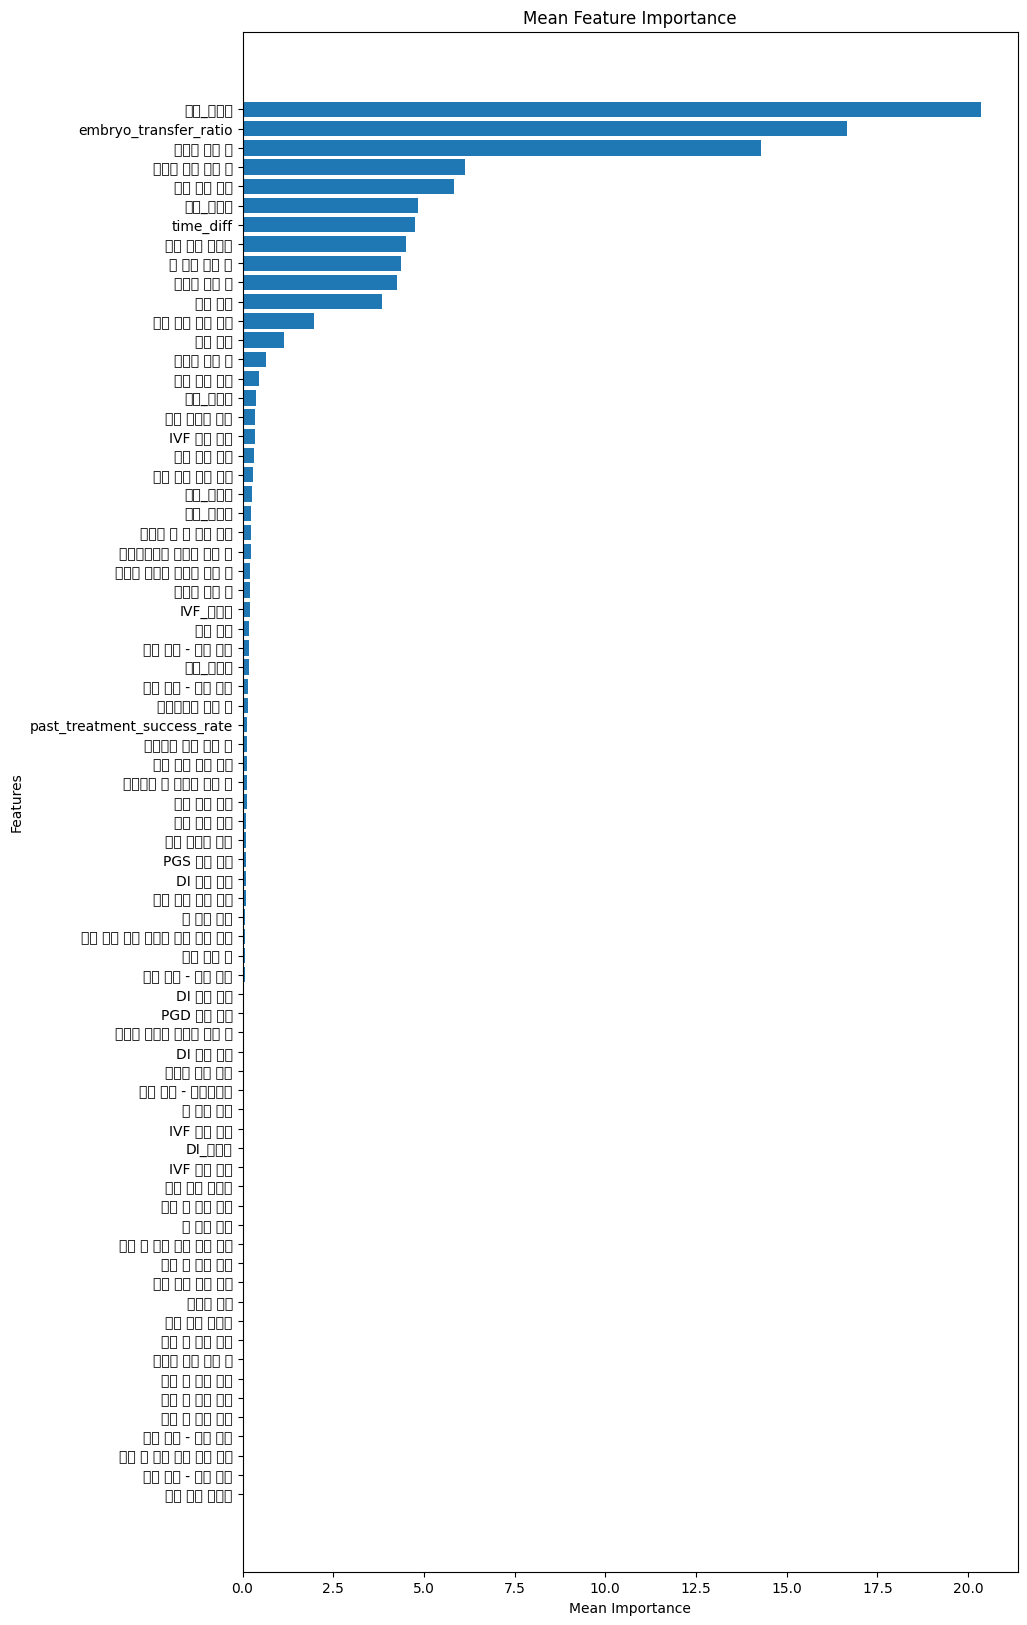

In [57]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

mean_auc, sorted_features, sorted_importance = evaluate_feature_importance(auc_list, feature_importance_list, x_train)
#예상 Score: 0.7397551138764016 -> 7389 (현재까지 한거)
#예상 Score: 0.7399120707670876 -> 7403
# all fix : -> 20fold 0.7412
# all fix : -> 30fold 0.7413539869
# all fix + 0만 있어서 계산 다했기에 난자채취일 drop : -> 35fold 0.7413530078
#예상 Score: 0.7393244729077305(제출 -> 0.7405)

### optuna 아직 적용 안함

### Optuna

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
import optuna
from sklearn.metrics import log_loss

# 데이터 로드 (예제)
# df_train = pd.read_csv("data.csv")
# KFold 설정

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def objective(trial):
    params = {
        'iterations': 5000 ,
        'depth': trial.suggest_int('depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 100, 255),
        'loss_function': 'Logloss',
        'eval_metric': 'Logloss',
        'od_type': 'Iter',
        'od_wait': 200,
        'random_seed': RANDOM_STATE,
        'verbose': 100,  # 로그 최소화
        'use_best_model': True,
        'task_type': 'GPU',  # 🚀 GPU 사용 설정
        'devices': '0',  # 선택 사항: 특정 GPU 지정
        'class_weights' : {0: 1.0, 1: trial.suggest_float('class_weight_1', 1.0, 3.0)}
    }


    logloss_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, df_train["임신 성공 여부"])):
        train_data, val_data = df_train.iloc[train_idx], df_train.iloc[val_idx]
        x_train, y_train = train_data.drop('임신 성공 여부', axis=1), train_data["임신 성공 여부"]
        x_val, y_val = val_data.drop('임신 성공 여부', axis=1), val_data["임신 성공 여부"]

        train_pool = Pool(x_train, label=y_train, cat_features=updated_category_columns)
        eval_pool = Pool(x_val, label=y_val, cat_features=updated_category_columns)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=eval_pool, early_stopping_rounds=50)

        val_pred_probs = model.predict_proba(x_val)[:, 1]  # 확률값
        logloss = log_loss(y_val, val_pred_probs)  # 수정된 부분
        logloss_scores.append(logloss)

    return np.mean(logloss_scores)

# Optuna 실행
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# 최적 하이퍼파라미터 출력
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2025-02-06 20:49:29,162] A new study created in memory with name: no-name-bd193135-c382-4832-8ffa-958da3404336


0:	learn: 0.6928470	test: 0.6928449	best: 0.6928449 (0)	total: 35.9ms	remaining: 2m 59s
100:	learn: 0.6676681	test: 0.6674347	best: 0.6674347 (100)	total: 3.45s	remaining: 2m 47s
200:	learn: 0.6484438	test: 0.6480095	best: 0.6480095 (200)	total: 6.95s	remaining: 2m 45s
300:	learn: 0.6336539	test: 0.6330490	best: 0.6330490 (300)	total: 10.5s	remaining: 2m 43s
400:	learn: 0.6222120	test: 0.6214776	best: 0.6214776 (400)	total: 13.9s	remaining: 2m 39s
500:	learn: 0.6131557	test: 0.6123162	best: 0.6123162 (500)	total: 17.4s	remaining: 2m 35s
600:	learn: 0.6067700	test: 0.6058544	best: 0.6058544 (600)	total: 20.8s	remaining: 2m 32s
700:	learn: 0.6020662	test: 0.6010999	best: 0.6010999 (700)	total: 24.3s	remaining: 2m 28s
800:	learn: 0.5977908	test: 0.5967833	best: 0.5967833 (800)	total: 27.8s	remaining: 2m 25s
900:	learn: 0.5941781	test: 0.5931419	best: 0.5931419 (900)	total: 31.3s	remaining: 2m 22s
1000:	learn: 0.5910479	test: 0.5899831	best: 0.5899831 (1000)	total: 34.7s	remaining: 2m 18s


[I 2025-02-06 21:18:52,799] Trial 0 finished with value: 0.5255728153401625 and parameters: {'depth': 7, 'learning_rate': 0.000635256600077261, 'l2_leaf_reg': 1.488894777704954, 'random_strength': 0.4236345608777277, 'bagging_temperature': 0.7327217900399661, 'border_count': 182, 'class_weight_1': 1.869834798094618}. Best is trial 0 with value: 0.5255728153401625.


0:	learn: 0.6930774	test: 0.6930767	best: 0.6930767 (0)	total: 22ms	remaining: 1m 50s
100:	learn: 0.6863102	test: 0.6862269	best: 0.6862269 (100)	total: 2.18s	remaining: 1m 45s
200:	learn: 0.6800317	test: 0.6798683	best: 0.6798683 (200)	total: 4.33s	remaining: 1m 43s
300:	learn: 0.6743326	test: 0.6740835	best: 0.6740835 (300)	total: 6.47s	remaining: 1m 41s
400:	learn: 0.6690989	test: 0.6687661	best: 0.6687661 (400)	total: 8.62s	remaining: 1m 38s
500:	learn: 0.6642640	test: 0.6638493	best: 0.6638493 (500)	total: 10.8s	remaining: 1m 36s
600:	learn: 0.6598582	test: 0.6593608	best: 0.6593608 (600)	total: 12.9s	remaining: 1m 34s
700:	learn: 0.6557444	test: 0.6551689	best: 0.6551689 (700)	total: 15.1s	remaining: 1m 32s
800:	learn: 0.6518497	test: 0.6512045	best: 0.6512045 (800)	total: 17.2s	remaining: 1m 30s
900:	learn: 0.6482834	test: 0.6475733	best: 0.6475733 (900)	total: 19.4s	remaining: 1m 28s
1000:	learn: 0.6449508	test: 0.6441788	best: 0.6441788 (1000)	total: 21.6s	remaining: 1m 26s
11

[I 2025-02-06 21:37:27,999] Trial 1 finished with value: 0.56907725598439 and parameters: {'depth': 5, 'learning_rate': 0.00017933137284148213, 'l2_leaf_reg': 0.08049921012384853, 'random_strength': 0.6139883683788534, 'bagging_temperature': 0.7224705796551218, 'border_count': 163, 'class_weight_1': 2.214109928926554}. Best is trial 0 with value: 0.5255728153401625.


4999:	learn: 0.5951117	test: 0.5951053	best: 0.5951053 (4999)	total: 1m 49s	remaining: 0us
bestTest = 0.59510527
bestIteration = 4999
0:	learn: 0.6878088	test: 0.6877737	best: 0.6877737 (0)	total: 44ms	remaining: 3m 39s
100:	learn: 0.5475401	test: 0.5474991	best: 0.5474991 (100)	total: 4.36s	remaining: 3m 31s
200:	learn: 0.5327149	test: 0.5336630	best: 0.5336630 (200)	total: 8.73s	remaining: 3m 28s
300:	learn: 0.5280202	test: 0.5302965	best: 0.5302965 (300)	total: 13.1s	remaining: 3m 24s
400:	learn: 0.5253658	test: 0.5290367	best: 0.5290367 (400)	total: 17.5s	remaining: 3m 20s
500:	learn: 0.5232909	test: 0.5284646	best: 0.5284646 (500)	total: 21.9s	remaining: 3m 16s
600:	learn: 0.5216850	test: 0.5281529	best: 0.5281529 (600)	total: 26.2s	remaining: 3m 12s
700:	learn: 0.5201984	test: 0.5279183	best: 0.5279183 (700)	total: 30.5s	remaining: 3m 7s
800:	learn: 0.5188152	test: 0.5277541	best: 0.5277400 (791)	total: 34.9s	remaining: 3m 2s
900:	learn: 0.5174590	test: 0.5276438	best: 0.5276438 

[I 2025-02-06 21:45:42,954] Trial 2 finished with value: 0.4950009878370844 and parameters: {'depth': 8, 'learning_rate': 0.009193504141516706, 'l2_leaf_reg': 0.00019242753282822016, 'random_strength': 1.3258789949838995e-05, 'bagging_temperature': 0.7573277119911623, 'border_count': 255, 'class_weight_1': 1.32361633652135}. Best is trial 2 with value: 0.4950009878370844.


0:	learn: 0.6734815	test: 0.6733224	best: 0.6733224 (0)	total: 44.8ms	remaining: 3m 43s
100:	learn: 0.5602011	test: 0.5639852	best: 0.5639852 (100)	total: 4.44s	remaining: 3m 35s
200:	learn: 0.5547622	test: 0.5631665	best: 0.5631372 (184)	total: 8.69s	remaining: 3m 27s
300:	learn: 0.5510586	test: 0.5629845	best: 0.5629791 (298)	total: 12.9s	remaining: 3m 21s
bestTest = 0.5629225614
bestIteration = 330
Shrink model to first 331 iterations.
0:	learn: 0.6726882	test: 0.6730522	best: 0.6730522 (0)	total: 43.9ms	remaining: 3m 39s
100:	learn: 0.5596621	test: 0.5698140	best: 0.5698140 (100)	total: 4.45s	remaining: 3m 36s
200:	learn: 0.5545318	test: 0.5690864	best: 0.5690489 (193)	total: 8.73s	remaining: 3m 28s
300:	learn: 0.5507618	test: 0.5689498	best: 0.5688784 (262)	total: 13s	remaining: 3m 23s
bestTest = 0.5688783929
bestIteration = 262
Shrink model to first 263 iterations.
0:	learn: 0.6729853	test: 0.6732804	best: 0.6732804 (0)	total: 43.7ms	remaining: 3m 38s
100:	learn: 0.5600530	test: 

[I 2025-02-06 21:48:48,223] Trial 3 finished with value: 0.5237425170164233 and parameters: {'depth': 8, 'learning_rate': 0.04619544123985885, 'l2_leaf_reg': 1.3826458616919406, 'random_strength': 0.02085698432123266, 'bagging_temperature': 0.335930350105181, 'border_count': 158, 'class_weight_1': 1.9094274163277143}. Best is trial 2 with value: 0.4950009878370844.


bestTest = 0.5639751402
bestIteration = 266
Shrink model to first 267 iterations.
0:	learn: 0.6924170	test: 0.6924105	best: 0.6924105 (0)	total: 27.5ms	remaining: 2m 17s
100:	learn: 0.6413004	test: 0.6407173	best: 0.6407173 (100)	total: 2.75s	remaining: 2m 13s
200:	learn: 0.6176433	test: 0.6167092	best: 0.6167092 (200)	total: 5.5s	remaining: 2m 11s
300:	learn: 0.6064744	test: 0.6053113	best: 0.6053113 (300)	total: 8.32s	remaining: 2m 9s
400:	learn: 0.5987679	test: 0.5975646	best: 0.5975646 (400)	total: 11.2s	remaining: 2m 7s
500:	learn: 0.5933273	test: 0.5921614	best: 0.5921614 (500)	total: 14.1s	remaining: 2m 6s
600:	learn: 0.5895453	test: 0.5884265	best: 0.5884265 (600)	total: 16.9s	remaining: 2m 4s
700:	learn: 0.5868453	test: 0.5857707	best: 0.5857707 (700)	total: 19.8s	remaining: 2m 1s
800:	learn: 0.5847795	test: 0.5837539	best: 0.5837539 (800)	total: 22.6s	remaining: 1m 58s
900:	learn: 0.5831322	test: 0.5821405	best: 0.5821405 (900)	total: 25.4s	remaining: 1m 55s
1000:	learn: 0.58

[I 2025-02-06 22:12:18,402] Trial 4 finished with value: 0.5661999570434328 and parameters: {'depth': 6, 'learning_rate': 0.0019728049008225883, 'l2_leaf_reg': 0.8920434215771015, 'random_strength': 0.0011198045571175705, 'bagging_temperature': 0.8867854944154111, 'border_count': 187, 'class_weight_1': 2.5496999476616633}. Best is trial 2 with value: 0.4950009878370844.


0:	learn: 0.6923609	test: 0.6923524	best: 0.6923524 (0)	total: 28.8ms	remaining: 2m 23s
100:	learn: 0.6394110	test: 0.6388800	best: 0.6388800 (100)	total: 2.9s	remaining: 2m 20s
200:	learn: 0.6118927	test: 0.6111124	best: 0.6111124 (200)	total: 5.75s	remaining: 2m 17s
300:	learn: 0.5954844	test: 0.5945384	best: 0.5945384 (300)	total: 8.65s	remaining: 2m 15s
400:	learn: 0.5833983	test: 0.5823073	best: 0.5823073 (400)	total: 11.5s	remaining: 2m 12s
500:	learn: 0.5747619	test: 0.5735925	best: 0.5735925 (500)	total: 14.2s	remaining: 2m 7s
600:	learn: 0.5686737	test: 0.5674388	best: 0.5674388 (600)	total: 17s	remaining: 2m 4s
700:	learn: 0.5640130	test: 0.5627329	best: 0.5627329 (700)	total: 19.8s	remaining: 2m 1s
800:	learn: 0.5606216	test: 0.5593417	best: 0.5593417 (800)	total: 22.6s	remaining: 1m 58s
900:	learn: 0.5575763	test: 0.5562943	best: 0.5562943 (900)	total: 25.3s	remaining: 1m 55s
1000:	learn: 0.5552014	test: 0.5539082	best: 0.5539082 (1000)	total: 28.1s	remaining: 1m 52s
1100:	

[I 2025-02-06 22:36:17,676] Trial 5 finished with value: 0.5008110777547774 and parameters: {'depth': 6, 'learning_rate': 0.0014368699654364028, 'l2_leaf_reg': 0.00027449495807997974, 'random_strength': 7.740045948781684, 'bagging_temperature': 0.2707696397223489, 'border_count': 223, 'class_weight_1': 1.4220856460871845}. Best is trial 2 with value: 0.4950009878370844.


0:	learn: 0.6930337	test: 0.6930339	best: 0.6930339 (0)	total: 82.8ms	remaining: 6m 53s
100:	learn: 0.6819367	test: 0.6819328	best: 0.6819328 (100)	total: 8.03s	remaining: 6m 29s
200:	learn: 0.6719487	test: 0.6719586	best: 0.6719586 (200)	total: 16.1s	remaining: 6m 23s
300:	learn: 0.6630722	test: 0.6631026	best: 0.6631026 (300)	total: 24.1s	remaining: 6m 15s
400:	learn: 0.6553540	test: 0.6554051	best: 0.6554051 (400)	total: 32s	remaining: 6m 7s
500:	learn: 0.6485170	test: 0.6485864	best: 0.6485864 (500)	total: 40s	remaining: 5m 59s
600:	learn: 0.6424255	test: 0.6425191	best: 0.6425191 (600)	total: 48s	remaining: 5m 51s
700:	learn: 0.6369336	test: 0.6370606	best: 0.6370606 (700)	total: 55.9s	remaining: 5m 43s
800:	learn: 0.6320264	test: 0.6321925	best: 0.6321925 (800)	total: 1m 3s	remaining: 5m 34s
900:	learn: 0.6276413	test: 0.6278514	best: 0.6278514 (900)	total: 1m 11s	remaining: 5m 26s
1000:	learn: 0.6236675	test: 0.6239266	best: 0.6239266 (1000)	total: 1m 19s	remaining: 5m 18s
1100:

[I 2025-02-06 23:45:24,292] Trial 6 finished with value: 0.5810366167602252 and parameters: {'depth': 10, 'learning_rate': 0.00026183671939696246, 'l2_leaf_reg': 0.00015851598404271807, 'random_strength': 0.08799036349975653, 'bagging_temperature': 0.19035524713604224, 'border_count': 183, 'class_weight_1': 2.8350640445346853}. Best is trial 2 with value: 0.4950009878370844.


0:	learn: 0.6925879	test: 0.6925834	best: 0.6925834 (0)	total: 27.7ms	remaining: 2m 18s
100:	learn: 0.6476200	test: 0.6472399	best: 0.6472399 (100)	total: 2.74s	remaining: 2m 13s
200:	learn: 0.6190219	test: 0.6183479	best: 0.6183479 (200)	total: 5.45s	remaining: 2m 10s
300:	learn: 0.6040601	test: 0.6031990	best: 0.6031990 (300)	total: 8.18s	remaining: 2m 7s
400:	learn: 0.5934251	test: 0.5924569	best: 0.5924569 (400)	total: 10.9s	remaining: 2m 4s
500:	learn: 0.5850806	test: 0.5840610	best: 0.5840610 (500)	total: 13.7s	remaining: 2m 2s
600:	learn: 0.5783073	test: 0.5772737	best: 0.5772737 (600)	total: 16.5s	remaining: 2m
700:	learn: 0.5732184	test: 0.5721803	best: 0.5721803 (700)	total: 19.3s	remaining: 1m 58s
800:	learn: 0.5692869	test: 0.5682576	best: 0.5682576 (800)	total: 22.1s	remaining: 1m 56s
900:	learn: 0.5657884	test: 0.5647864	best: 0.5647864 (900)	total: 24.9s	remaining: 1m 53s
1000:	learn: 0.5632772	test: 0.5623008	best: 0.5623008 (1000)	total: 27.7s	remaining: 1m 50s
1100:	l

[I 2025-02-07 00:08:53,043] Trial 7 finished with value: 0.5055167328065858 and parameters: {'depth': 6, 'learning_rate': 0.001108489993908753, 'l2_leaf_reg': 6.308998503051675e-05, 'random_strength': 0.023954700742042343, 'bagging_temperature': 0.41281589794032314, 'border_count': 228, 'class_weight_1': 1.5411283467290735}. Best is trial 2 with value: 0.4950009878370844.


0:	learn: 0.6930752	test: 0.6930745	best: 0.6930745 (0)	total: 22.4ms	remaining: 1m 51s
100:	learn: 0.6865943	test: 0.6864930	best: 0.6864930 (100)	total: 2.19s	remaining: 1m 46s
200:	learn: 0.6804522	test: 0.6802566	best: 0.6802566 (200)	total: 4.37s	remaining: 1m 44s
300:	learn: 0.6747878	test: 0.6744961	best: 0.6744961 (300)	total: 6.54s	remaining: 1m 42s
400:	learn: 0.6693900	test: 0.6690087	best: 0.6690087 (400)	total: 8.7s	remaining: 1m 39s
500:	learn: 0.6642985	test: 0.6638348	best: 0.6638348 (500)	total: 11s	remaining: 1m 38s
600:	learn: 0.6595154	test: 0.6589737	best: 0.6589737 (600)	total: 13.1s	remaining: 1m 35s
700:	learn: 0.6550284	test: 0.6544153	best: 0.6544153 (700)	total: 15.3s	remaining: 1m 33s
800:	learn: 0.6508670	test: 0.6501856	best: 0.6501856 (800)	total: 17.4s	remaining: 1m 31s
900:	learn: 0.6469553	test: 0.6462090	best: 0.6462090 (900)	total: 19.6s	remaining: 1m 28s
1000:	learn: 0.6432298	test: 0.6424236	best: 0.6424236 (1000)	total: 21.7s	remaining: 1m 26s
110

[I 2025-02-07 00:27:23,844] Trial 8 finished with value: 0.5552128337937796 and parameters: {'depth': 5, 'learning_rate': 0.00015898775632572763, 'l2_leaf_reg': 0.0001180457549789447, 'random_strength': 1.0506698231485099, 'bagging_temperature': 0.5235997706002763, 'border_count': 107, 'class_weight_1': 1.7446032332371175}. Best is trial 2 with value: 0.4950009878370844.


4999:	learn: 0.5859223	test: 0.5859203	best: 0.5859203 (4999)	total: 1m 48s	remaining: 0us
bestTest = 0.5859203425
bestIteration = 4999
0:	learn: 0.6705484	test: 0.6704385	best: 0.6704385 (0)	total: 59.3ms	remaining: 4m 56s
100:	learn: 0.5352283	test: 0.5462866	best: 0.5462866 (100)	total: 5.82s	remaining: 4m 42s
200:	learn: 0.5247981	test: 0.5465105	best: 0.5460006 (168)	total: 11.6s	remaining: 4m 36s
bestTest = 0.5460006383
bestIteration = 168
Shrink model to first 169 iterations.
0:	learn: 0.6691486	test: 0.6695516	best: 0.6695516 (0)	total: 57.6ms	remaining: 4m 48s
100:	learn: 0.5343201	test: 0.5514442	best: 0.5514406 (98)	total: 5.9s	remaining: 4m 46s
bestTest = 0.5513335715
bestIteration = 125
Shrink model to first 126 iterations.
0:	learn: 0.6698405	test: 0.6701326	best: 0.6701326 (0)	total: 58.9ms	remaining: 4m 54s
100:	learn: 0.5347802	test: 0.5478906	best: 0.5478779 (98)	total: 5.95s	remaining: 4m 48s
200:	learn: 0.5244625	test: 0.5478011	best: 0.5476397 (176)	total: 11.7s	re

[I 2025-02-07 00:29:40,916] Trial 9 finished with value: 0.5046130699607504 and parameters: {'depth': 9, 'learning_rate': 0.043655852025210475, 'l2_leaf_reg': 0.0001883619489389917, 'random_strength': 0.00899958234258651, 'bagging_temperature': 0.4800781060383591, 'border_count': 189, 'class_weight_1': 1.5318709633746899}. Best is trial 2 with value: 0.4950009878370844.


bestTest = 0.5478265596
bestIteration = 182
Shrink model to first 183 iterations.
0:	learn: 0.6861586	test: 0.6862513	best: 0.6862513 (0)	total: 209ms	remaining: 17m 23s
100:	learn: 0.5126797	test: 0.5236681	best: 0.5236681 (100)	total: 21.9s	remaining: 17m 41s
200:	learn: 0.4862472	test: 0.5089498	best: 0.5089498 (200)	total: 43.7s	remaining: 17m 23s
300:	learn: 0.4747259	test: 0.5067518	best: 0.5067518 (300)	total: 1m 5s	remaining: 17m 1s
400:	learn: 0.4665112	test: 0.5063371	best: 0.5063371 (400)	total: 1m 27s	remaining: 16m 40s
500:	learn: 0.4596340	test: 0.5062242	best: 0.5061559 (478)	total: 1m 48s	remaining: 16m 17s
bestTest = 0.5061558951
bestIteration = 478
Shrink model to first 479 iterations.
0:	learn: 0.6866150	test: 0.6867781	best: 0.6867781 (0)	total: 206ms	remaining: 17m 8s
100:	learn: 0.5111260	test: 0.5261678	best: 0.5261678 (100)	total: 21.8s	remaining: 17m 37s
200:	learn: 0.4852491	test: 0.5129017	best: 0.5129017 (200)	total: 43.6s	remaining: 17m 20s
300:	learn: 0.47

[I 2025-02-07 00:48:26,773] Trial 10 finished with value: 0.4917758305371397 and parameters: {'depth': 12, 'learning_rate': 0.008861733052670651, 'l2_leaf_reg': 0.009839640808739537, 'random_strength': 2.0602093909970227e-05, 'bagging_temperature': 0.9297488266920255, 'border_count': 245, 'class_weight_1': 1.1049840273905682}. Best is trial 10 with value: 0.4917758305371397.


0:	learn: 0.6857272	test: 0.6858266	best: 0.6858266 (0)	total: 212ms	remaining: 17m 40s
100:	learn: 0.5100831	test: 0.5220403	best: 0.5220403 (100)	total: 21.7s	remaining: 17m 33s
200:	learn: 0.4851337	test: 0.5089675	best: 0.5089675 (200)	total: 43.5s	remaining: 17m 18s
300:	learn: 0.4739387	test: 0.5070581	best: 0.5070581 (300)	total: 1m 5s	remaining: 16m 55s
400:	learn: 0.4654740	test: 0.5067088	best: 0.5066716 (383)	total: 1m 26s	remaining: 16m 33s
bestTest = 0.5066346662
bestIteration = 427
Shrink model to first 428 iterations.
0:	learn: 0.6862141	test: 0.6863885	best: 0.6863885 (0)	total: 209ms	remaining: 17m 22s
100:	learn: 0.5093047	test: 0.5252485	best: 0.5252485 (100)	total: 21.9s	remaining: 17m 40s
200:	learn: 0.4841372	test: 0.5129575	best: 0.5129575 (200)	total: 43.6s	remaining: 17m 21s
300:	learn: 0.4727174	test: 0.5112277	best: 0.5112277 (300)	total: 1m 5s	remaining: 16m 58s
400:	learn: 0.4632774	test: 0.5109817	best: 0.5109552 (372)	total: 1m 26s	remaining: 16m 34s
best

[I 2025-02-07 01:07:02,677] Trial 11 finished with value: 0.49185213442845716 and parameters: {'depth': 12, 'learning_rate': 0.009430205220849601, 'l2_leaf_reg': 0.009079486341526595, 'random_strength': 1.0079689379363546e-05, 'bagging_temperature': 0.9649660831518004, 'border_count': 253, 'class_weight_1': 1.1099127304985688}. Best is trial 10 with value: 0.4917758305371397.


0:	learn: 0.6869681	test: 0.6870566	best: 0.6870566 (0)	total: 214ms	remaining: 17m 50s
100:	learn: 0.5136593	test: 0.5229354	best: 0.5229354 (100)	total: 21.7s	remaining: 17m 32s
200:	learn: 0.4838663	test: 0.5028342	best: 0.5028342 (200)	total: 43.5s	remaining: 17m 19s
300:	learn: 0.4722936	test: 0.4986358	best: 0.4986358 (300)	total: 1m 5s	remaining: 16m 57s
400:	learn: 0.4647047	test: 0.4977320	best: 0.4977320 (400)	total: 1m 26s	remaining: 16m 34s
500:	learn: 0.4583454	test: 0.4974028	best: 0.4973994 (493)	total: 1m 48s	remaining: 16m 12s
600:	learn: 0.4527466	test: 0.4973222	best: 0.4972614 (551)	total: 2m 9s	remaining: 15m 49s
bestTest = 0.4972614237
bestIteration = 551
Shrink model to first 552 iterations.
0:	learn: 0.6874865	test: 0.6876231	best: 0.6876231 (0)	total: 205ms	remaining: 17m 7s
100:	learn: 0.5127703	test: 0.5253272	best: 0.5253272 (100)	total: 21.6s	remaining: 17m 29s
200:	learn: 0.4829061	test: 0.5067614	best: 0.5067614 (200)	total: 43.4s	remaining: 17m 16s
300:	

[I 2025-02-07 01:29:38,459] Trial 12 finished with value: 0.49135324304677114 and parameters: {'depth': 12, 'learning_rate': 0.007325545951199754, 'l2_leaf_reg': 0.005586714488628787, 'random_strength': 1.0255262452088817e-05, 'bagging_temperature': 0.9377899664665861, 'border_count': 254, 'class_weight_1': 1.0429606197886836}. Best is trial 12 with value: 0.49135324304677114.


0:	learn: 0.6870890	test: 0.6871390	best: 0.6871390 (0)	total: 208ms	remaining: 17m 19s
100:	learn: 0.5095213	test: 0.5175997	best: 0.5175997 (100)	total: 21.6s	remaining: 17m 29s
200:	learn: 0.4801306	test: 0.4965604	best: 0.4965604 (200)	total: 43.4s	remaining: 17m 15s
300:	learn: 0.4700495	test: 0.4924956	best: 0.4924956 (300)	total: 1m 4s	remaining: 16m 54s
400:	learn: 0.4628291	test: 0.4915490	best: 0.4915490 (400)	total: 1m 26s	remaining: 16m 31s
500:	learn: 0.4569849	test: 0.4912974	best: 0.4912911 (494)	total: 1m 47s	remaining: 16m 8s
600:	learn: 0.4523958	test: 0.4912885	best: 0.4912587 (559)	total: 2m 9s	remaining: 15m 44s
bestTest = 0.4912586702
bestIteration = 559
Shrink model to first 560 iterations.
0:	learn: 0.6870431	test: 0.6871654	best: 0.6871654 (0)	total: 212ms	remaining: 17m 39s
100:	learn: 0.5092081	test: 0.5204378	best: 0.5204378 (100)	total: 21.4s	remaining: 17m 16s
200:	learn: 0.4800899	test: 0.5007802	best: 0.5007802 (200)	total: 42.9s	remaining: 17m 3s
300:	l

[I 2025-02-07 01:53:42,145] Trial 13 finished with value: 0.49089066062483333 and parameters: {'depth': 12, 'learning_rate': 0.0073448648465998835, 'l2_leaf_reg': 0.004674334562289694, 'random_strength': 0.0001859239090283637, 'bagging_temperature': 0.033740162229742854, 'border_count': 219, 'class_weight_1': 1.0061237947144779}. Best is trial 13 with value: 0.49089066062483333.


0:	learn: 0.6897268	test: 0.6897255	best: 0.6897255 (0)	total: 122ms	remaining: 10m 10s
100:	learn: 0.5441891	test: 0.5462670	best: 0.5462670 (100)	total: 12.6s	remaining: 10m 9s
200:	learn: 0.5083291	test: 0.5131616	best: 0.5131616 (200)	total: 25.4s	remaining: 10m 6s
300:	learn: 0.4915932	test: 0.4997968	best: 0.4997968 (300)	total: 38.5s	remaining: 10m 1s
400:	learn: 0.4831623	test: 0.4942442	best: 0.4942442 (400)	total: 51.6s	remaining: 9m 51s
500:	learn: 0.4784788	test: 0.4921535	best: 0.4921535 (500)	total: 1m 4s	remaining: 9m 38s
600:	learn: 0.4751196	test: 0.4911913	best: 0.4911913 (600)	total: 1m 17s	remaining: 9m 24s
700:	learn: 0.4720066	test: 0.4907615	best: 0.4907615 (700)	total: 1m 29s	remaining: 9m 11s
800:	learn: 0.4692504	test: 0.4905704	best: 0.4905704 (800)	total: 1m 42s	remaining: 8m 58s
900:	learn: 0.4668415	test: 0.4904183	best: 0.4904183 (899)	total: 1m 55s	remaining: 8m 45s
1000:	learn: 0.4647736	test: 0.4903299	best: 0.4903240 (996)	total: 2m 8s	remaining: 8m 3

[I 2025-02-07 02:20:09,289] Trial 14 finished with value: 0.49007668025078593 and parameters: {'depth': 11, 'learning_rate': 0.004229726838224041, 'l2_leaf_reg': 0.002113218642569417, 'random_strength': 0.00016896114427461314, 'bagging_temperature': 0.06141965500890133, 'border_count': 215, 'class_weight_1': 1.0040247719641917}. Best is trial 14 with value: 0.49007668025078593.


0:	learn: 0.6913880	test: 0.6913855	best: 0.6913855 (0)	total: 83.2ms	remaining: 6m 56s
100:	learn: 0.6074828	test: 0.6078283	best: 0.6078283 (100)	total: 8.06s	remaining: 6m 31s
200:	learn: 0.5869462	test: 0.5885874	best: 0.5885874 (200)	total: 16.6s	remaining: 6m 35s
300:	learn: 0.5775550	test: 0.5809192	best: 0.5809192 (300)	total: 25.1s	remaining: 6m 31s
400:	learn: 0.5720116	test: 0.5771079	best: 0.5771079 (400)	total: 33.6s	remaining: 6m 24s
500:	learn: 0.5683162	test: 0.5753073	best: 0.5753073 (500)	total: 42s	remaining: 6m 16s
600:	learn: 0.5652060	test: 0.5742386	best: 0.5742386 (600)	total: 50.4s	remaining: 6m 9s
700:	learn: 0.5626275	test: 0.5735094	best: 0.5735094 (700)	total: 58.8s	remaining: 6m
800:	learn: 0.5604241	test: 0.5730373	best: 0.5730373 (800)	total: 1m 7s	remaining: 5m 51s
900:	learn: 0.5584427	test: 0.5726874	best: 0.5726874 (900)	total: 1m 15s	remaining: 5m 42s
1000:	learn: 0.5566339	test: 0.5724574	best: 0.5724574 (1000)	total: 1m 23s	remaining: 5m 33s
1100:

[I 2025-02-07 02:39:40,917] Trial 15 finished with value: 0.5402482060673954 and parameters: {'depth': 10, 'learning_rate': 0.003520158495465332, 'l2_leaf_reg': 0.001871323170013471, 'random_strength': 0.00020930235209062895, 'bagging_temperature': 0.012896367530163495, 'border_count': 213, 'class_weight_1': 2.1748266289333302}. Best is trial 14 with value: 0.49007668025078593.


0:	learn: 0.6799576	test: 0.6800236	best: 0.6800236 (0)	total: 129ms	remaining: 10m 45s
100:	learn: 0.5150290	test: 0.5269234	best: 0.5269234 (100)	total: 12.9s	remaining: 10m 24s
200:	learn: 0.5013735	test: 0.5252449	best: 0.5252276 (195)	total: 25.6s	remaining: 10m 10s
bestTest = 0.525107757
bestIteration = 220
Shrink model to first 221 iterations.
0:	learn: 0.6792478	test: 0.6794918	best: 0.6794918 (0)	total: 123ms	remaining: 10m 16s
100:	learn: 0.5144889	test: 0.5318552	best: 0.5318552 (100)	total: 13s	remaining: 10m 31s
200:	learn: 0.5006535	test: 0.5303777	best: 0.5303777 (200)	total: 25.8s	remaining: 10m 16s
bestTest = 0.5302468169
bestIteration = 234
Shrink model to first 235 iterations.
0:	learn: 0.6793038	test: 0.6795080	best: 0.6795080 (0)	total: 122ms	remaining: 10m 11s
100:	learn: 0.5151112	test: 0.5292008	best: 0.5292008 (100)	total: 12.9s	remaining: 10m 25s
200:	learn: 0.5011140	test: 0.5270083	best: 0.5269787 (195)	total: 25.6s	remaining: 10m 11s
300:	learn: 0.4917714	t

[I 2025-02-07 02:46:50,890] Trial 16 finished with value: 0.4943419880041757 and parameters: {'depth': 11, 'learning_rate': 0.021178551008550445, 'l2_leaf_reg': 0.10304360386497702, 'random_strength': 0.0002139052542394022, 'bagging_temperature': 0.00309682311513252, 'border_count': 206, 'class_weight_1': 1.2823514331008234}. Best is trial 14 with value: 0.49007668025078593.


bestTest = 0.5258488385
bestIteration = 221
Shrink model to first 222 iterations.
0:	learn: 0.6909294	test: 0.6909291	best: 0.6909291 (0)	total: 82.7ms	remaining: 6m 53s
100:	learn: 0.5895203	test: 0.5901894	best: 0.5901894 (100)	total: 8.04s	remaining: 6m 30s
200:	learn: 0.5666015	test: 0.5689364	best: 0.5689364 (200)	total: 16.4s	remaining: 6m 30s
300:	learn: 0.5565772	test: 0.5608911	best: 0.5608911 (300)	total: 24.7s	remaining: 6m 26s
400:	learn: 0.5509282	test: 0.5575957	best: 0.5575957 (400)	total: 33.1s	remaining: 6m 19s
500:	learn: 0.5471949	test: 0.5556702	best: 0.5556702 (500)	total: 41.5s	remaining: 6m 12s
600:	learn: 0.5441090	test: 0.5547762	best: 0.5547762 (600)	total: 50s	remaining: 6m 6s
700:	learn: 0.5414367	test: 0.5542634	best: 0.5542634 (700)	total: 58.4s	remaining: 5m 57s
800:	learn: 0.5390524	test: 0.5538745	best: 0.5538745 (800)	total: 1m 6s	remaining: 5m 49s
900:	learn: 0.5369491	test: 0.5535989	best: 0.5535989 (900)	total: 1m 14s	remaining: 5m 41s
1000:	learn: 

[I 2025-02-07 03:06:18,549] Trial 17 finished with value: 0.5098324030488557 and parameters: {'depth': 10, 'learning_rate': 0.004057085779187731, 'l2_leaf_reg': 0.0011693782762507714, 'random_strength': 0.001178841455864918, 'bagging_temperature': 0.15244398465066983, 'border_count': 129, 'class_weight_1': 1.6484420780097229}. Best is trial 14 with value: 0.49007668025078593.


0:	learn: 0.6785042	test: 0.6785683	best: 0.6785683 (0)	total: 121ms	remaining: 10m 6s
100:	learn: 0.5082551	test: 0.5263057	best: 0.5263057 (100)	total: 12.9s	remaining: 10m 23s
200:	learn: 0.4925936	test: 0.5253169	best: 0.5250098 (175)	total: 25.5s	remaining: 10m 9s
bestTest = 0.5250097569
bestIteration = 175
Shrink model to first 176 iterations.
0:	learn: 0.6782572	test: 0.6785472	best: 0.6785472 (0)	total: 122ms	remaining: 10m 12s
100:	learn: 0.5085063	test: 0.5314670	best: 0.5314670 (100)	total: 12.9s	remaining: 10m 25s
bestTest = 0.5305000433
bestIteration = 147
Shrink model to first 148 iterations.
0:	learn: 0.6783706	test: 0.6786250	best: 0.6786250 (0)	total: 123ms	remaining: 10m 16s
100:	learn: 0.5095898	test: 0.5277444	best: 0.5277444 (100)	total: 13s	remaining: 10m 28s
200:	learn: 0.4926547	test: 0.5265933	best: 0.5265933 (200)	total: 25.7s	remaining: 10m 12s
bestTest = 0.5264602065
bestIteration = 222
Shrink model to first 223 iterations.
0:	learn: 0.6794167	test: 0.679365

[I 2025-02-07 03:11:51,831] Trial 18 finished with value: 0.4958013542819731 and parameters: {'depth': 11, 'learning_rate': 0.02097892139280004, 'l2_leaf_reg': 1.3768425965869798e-05, 'random_strength': 0.000107355976747198, 'bagging_temperature': 0.09791159680597317, 'border_count': 207, 'class_weight_1': 1.2594480228201383}. Best is trial 14 with value: 0.49007668025078593.


bestTest = 0.5263159285
bestIteration = 176
Shrink model to first 177 iterations.
0:	learn: 0.6578765	test: 0.6579275	best: 0.6579275 (0)	total: 123ms	remaining: 10m 17s
bestTest = 0.5766143819
bestIteration = 35
Shrink model to first 36 iterations.
0:	learn: 0.6577569	test: 0.6589933	best: 0.6589933 (0)	total: 123ms	remaining: 10m 15s
bestTest = 0.5841176487
bestIteration = 30
Shrink model to first 31 iterations.
0:	learn: 0.6583866	test: 0.6590965	best: 0.6590965 (0)	total: 122ms	remaining: 10m 7s
bestTest = 0.5785998663
bestIteration = 40
Shrink model to first 41 iterations.
0:	learn: 0.6581061	test: 0.6580149	best: 0.6580149 (0)	total: 130ms	remaining: 10m 47s
bestTest = 0.5745960212
bestIteration = 36
Shrink model to first 37 iterations.
0:	learn: 0.6580358	test: 0.6583729	best: 0.6583729 (0)	total: 120ms	remaining: 9m 58s
bestTest = 0.5763933325
bestIteration = 44
Shrink model to first 45 iterations.
0:	learn: 0.6582554	test: 0.6590901	best: 0.6590901 (0)	total: 123ms	remaining: 

[I 2025-02-07 03:13:58,615] Trial 19 finished with value: 0.5574292412570765 and parameters: {'depth': 11, 'learning_rate': 0.08573367002186284, 'l2_leaf_reg': 0.043627747656853365, 'random_strength': 0.0015979809587754882, 'bagging_temperature': 0.23603395252549253, 'border_count': 228, 'class_weight_1': 2.432114690766928}. Best is trial 14 with value: 0.49007668025078593.


bestTest = 0.5786032289
bestIteration = 25
Shrink model to first 26 iterations.
0:	learn: 0.6928899	test: 0.6928880	best: 0.6928880 (0)	total: 54.3ms	remaining: 4m 31s
100:	learn: 0.6693530	test: 0.6692160	best: 0.6692160 (100)	total: 5.51s	remaining: 4m 27s
200:	learn: 0.6515171	test: 0.6513148	best: 0.6513148 (200)	total: 11.3s	remaining: 4m 28s
300:	learn: 0.6378893	test: 0.6376606	best: 0.6376606 (300)	total: 17s	remaining: 4m 25s
400:	learn: 0.6274022	test: 0.6271725	best: 0.6271725 (400)	total: 22.4s	remaining: 4m 17s
500:	learn: 0.6189016	test: 0.6186930	best: 0.6186930 (500)	total: 27.9s	remaining: 4m 10s
600:	learn: 0.6120807	test: 0.6119144	best: 0.6119144 (600)	total: 33.4s	remaining: 4m 4s
700:	learn: 0.6065982	test: 0.6065091	best: 0.6065091 (700)	total: 39.1s	remaining: 3m 59s
800:	learn: 0.6020295	test: 0.6020243	best: 0.6020243 (800)	total: 44.7s	remaining: 3m 54s
900:	learn: 0.5985271	test: 0.5986521	best: 0.5986521 (900)	total: 50.6s	remaining: 3m 50s
1000:	learn: 0.5

[I 2025-02-07 04:03:04,584] Trial 20 finished with value: 0.5928373994896726 and parameters: {'depth': 9, 'learning_rate': 0.0006452288156515844, 'l2_leaf_reg': 0.0011348458760108216, 'random_strength': 6.938810169729863e-05, 'bagging_temperature': 0.10146911627964228, 'border_count': 165, 'class_weight_1': 2.978042053910199}. Best is trial 14 with value: 0.49007668025078593.


0:	learn: 0.6881813	test: 0.6882456	best: 0.6882456 (0)	total: 208ms	remaining: 17m 17s
100:	learn: 0.5210241	test: 0.5279810	best: 0.5279810 (100)	total: 21.6s	remaining: 17m 26s
200:	learn: 0.4863470	test: 0.5015040	best: 0.5015040 (200)	total: 43.3s	remaining: 17m 14s
300:	learn: 0.4727918	test: 0.4941301	best: 0.4941301 (300)	total: 1m 4s	remaining: 16m 53s
400:	learn: 0.4654482	test: 0.4919909	best: 0.4919905 (399)	total: 1m 26s	remaining: 16m 30s
500:	learn: 0.4592767	test: 0.4911896	best: 0.4911896 (500)	total: 1m 47s	remaining: 16m 8s
600:	learn: 0.4543572	test: 0.4908165	best: 0.4908110 (588)	total: 2m 9s	remaining: 15m 46s
700:	learn: 0.4500614	test: 0.4907663	best: 0.4907426 (690)	total: 2m 30s	remaining: 15m 23s
bestTest = 0.4907419621
bestIteration = 713
Shrink model to first 714 iterations.
0:	learn: 0.6882341	test: 0.6883392	best: 0.6883392 (0)	total: 207ms	remaining: 17m 12s
100:	learn: 0.5201553	test: 0.5299947	best: 0.5299947 (100)	total: 21.6s	remaining: 17m 25s
200: